<a href="https://colab.research.google.com/github/NatashaTihonova/ComputerVisionProject/blob/master/blood_cells_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
print(cv2.__version__)

4.1.2


In [13]:
def showImage(imageForShowing, show_gray=False):
    plt.figure(figsize = (10, 10)) #height in inches
    plt.imshow(imageForShowing, cmap=('gray' if show_gray else 'viridis')) # shows image

In [4]:
filename = "blood_cells_task.png"

In [5]:
 name_img_blood = "/content/drive/MyDrive/task_images/" + filename #set image path

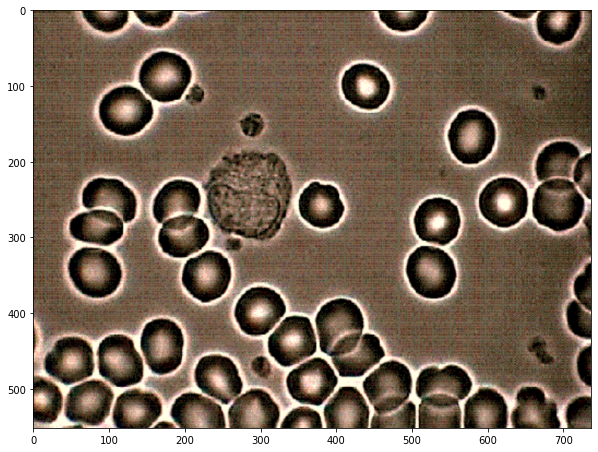

In [24]:
#load an image in grayscale mode, because we work with grayscale image
original = cv2.imread(name_img_blood) # save to show later
showImage(original)


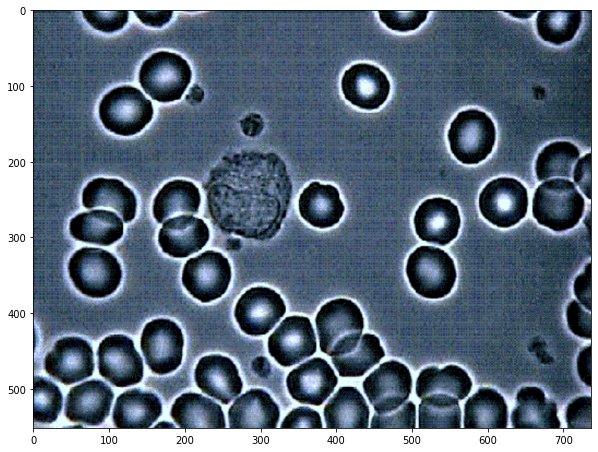

In [25]:

original_converted = cv2.cvtColor(original, cv2.COLOR_BGR2RGB) # image to work with
showImage(original_converted)


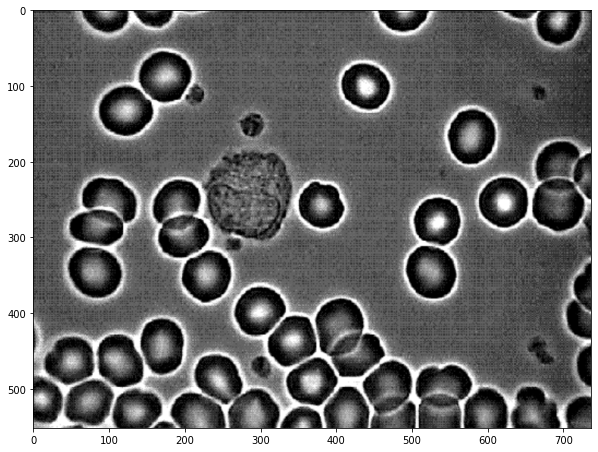

In [28]:
img_blood = cv2.cvtColor(original_converted, cv2.COLOR_RGB2GRAY) # image to work with
showImage(img_blood, True)

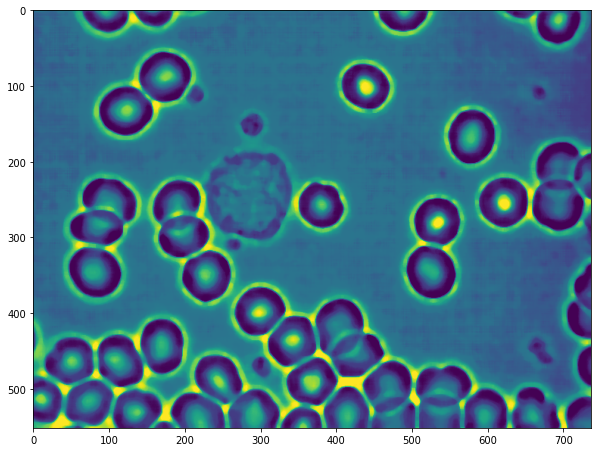

In [29]:
blur_img_blood = cv2.medianBlur(img_blood, 9) # Median Filtering for smoothing, takes median by 9 pixels around
#blur_img_blood = cv2.bilateralFilter(img_blood, 50, 50, cv2.BORDER_REFLECT) # Bilateral filter for smoothing, too many args, no way
showImage(blur_img_blood);

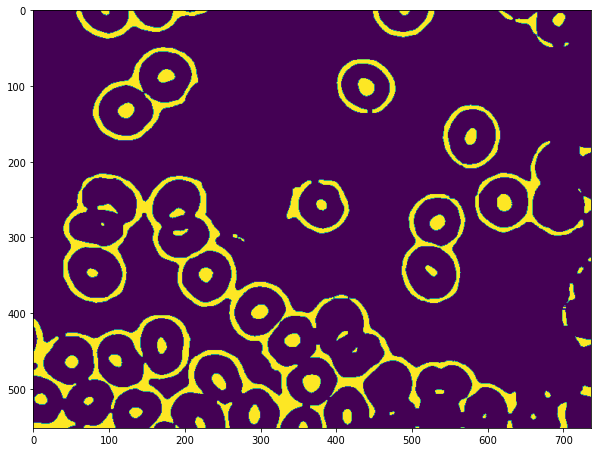

In [8]:
ret, binary_img_blood = cv2.threshold(blur_img_blood,150,255,cv2.THRESH_BINARY) #replace pixels darker than 150 to 0, lighter than 255 to 0, returns our limit and the image
#print(ret)
showImage(binary_img_blood);

Количество клеток:  60


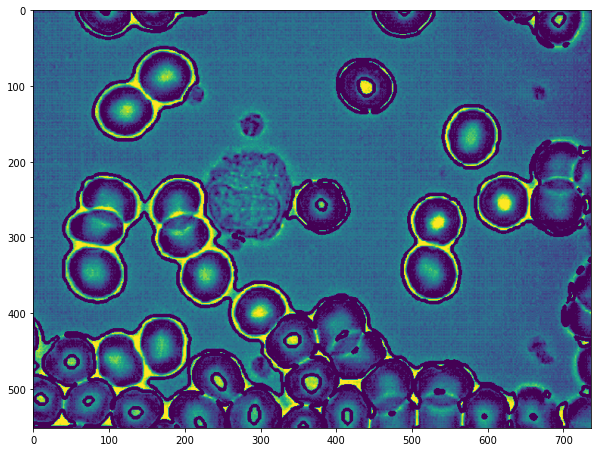

In [9]:
#select hierarcial (with the biggest size) contours from the image, retrieve only the extreme outer contours, applies one of the flavors of the Teh-Chin chain approximation algorithm
contours, hierarchy = cv2.findContours(binary_img_blood, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1) 
# draw outer contours over the image with black colour of 3px line
cv2.drawContours(img_blood, contours, -1, (0,0,0), 3, cv2.LINE_8, hierarchy, 1)
showImage(img_blood)
print("Количество клеток: ", int(len(contours)))

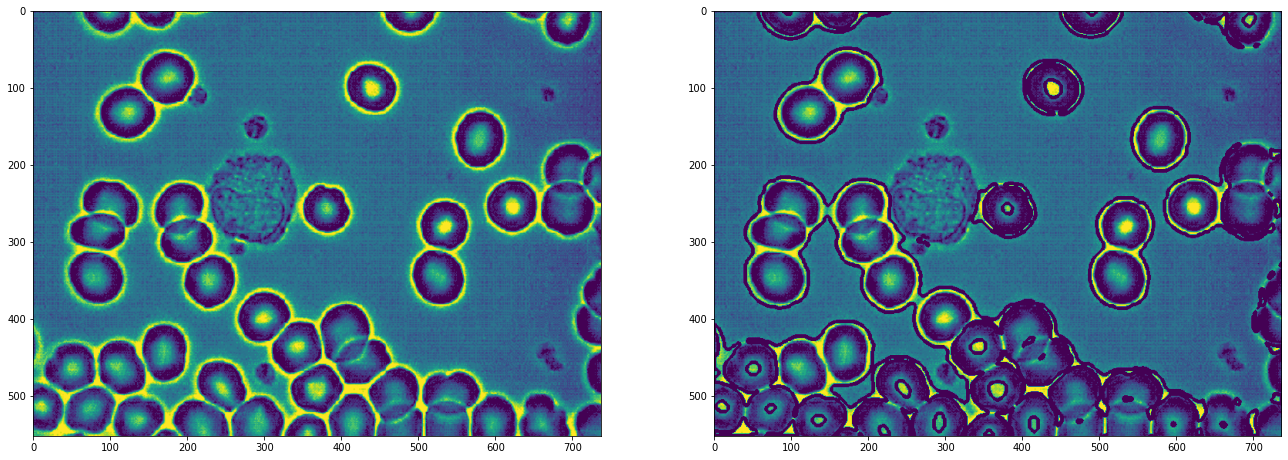

In [10]:
plt.figure(figsize = (120, 120))
plt.subplot(10, 10, 1)
plt.imshow(original)
plt.subplot(10, 10, 2)
plt.imshow(img_blood)
plt.show()